<a href="https://colab.research.google.com/github/mohripan/ComputerVisionPython/blob/main/OpticalFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch.nn.init as I

In [ ]:
!git clone https://github.com/mohripan/ComputerVisionPython.git

Cloning into 'ComputerVisionPython'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 121 (delta 17), reused 117 (delta 17), pack-reused 0
Receiving objects: 100% (121/121), 3.11 MiB | 26.30 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    #224x224 => 220x220 => 110x110
    self.conv1 = self.block(1, 32, 5)
    #110x110 => 106x106 => 53x53
    self.conv2 = self.block(32, 36, 5)
    #53x53 => 49x49 => 24x24
    self.conv3 = self.block(36, 48, 5)
    #24x24 => 22x22 => 11x11
    self.conv4 = self.block(48, 64, 3)
    #11x11 => 9x9 => 4x4
    self.conv5 = self.block(64, 64, 3)
    self.fc6 = nn.Linear(64*4*4, 136)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = x.view(x.size(0), -1)
    x = self.fc6(x)
    return x

  def block(self, in_channels, out_channels, kernel_size):
    return nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size),
                         nn.ReLU(),
                         nn.MaxPool2d(2, 2),
                         nn.Dropout(p=0.2))

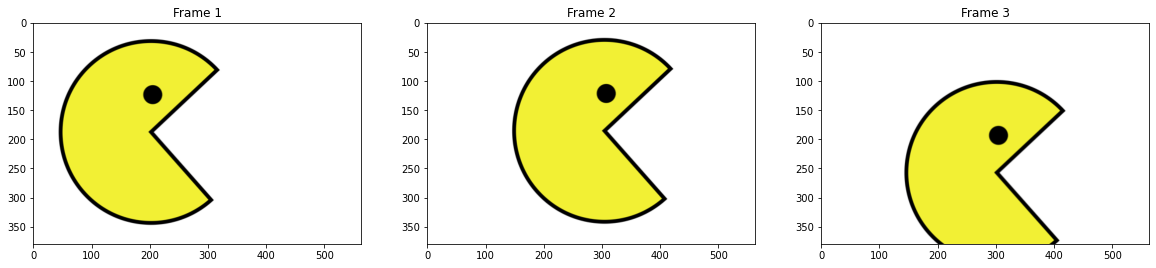

In [ ]:
frame_1 = cv2.imread('/content/ComputerVisionPython/Object_Localization/images/pacman_1.png')
frame_2 = cv2.imread('/content/ComputerVisionPython/Object_Localization/images/pacman_2.png')
frame_3 = cv2.imread('/content/ComputerVisionPython/Object_Localization/images/pacman_3.png')

def from_bgr_to_rgb(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

frame_1 = from_bgr_to_rgb(frame_1)
frame_2 = from_bgr_to_rgb(frame_2)
frame_3 = from_bgr_to_rgb(frame_3)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.set_title('Frame 1')
ax1.imshow(frame_1)
ax2.set_title('Frame 2')
ax2.imshow(frame_2)
ax3.set_title('Frame 3')
ax3.imshow(frame_3)

[[[318.  82.]]

 [[308. 304.]]

 [[208. 188.]]

 [[309.  81.]]

 [[299. 304.]]

 [[199. 188.]]]


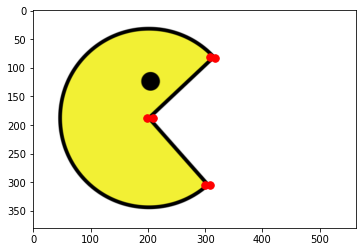

In [ ]:
feature_params = dict(maxCorners = 10,
                      qualityLevel = 0.2,
                      minDistance = 5,
                      blockSize = 5)

def change_gray(img):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  return gray

gray_1 = change_gray(frame_1)
gray_2 = change_gray(frame_2)
gray_3 = change_gray(frame_3)

pts_1 = cv2.goodFeaturesToTrack(gray_1, mask=None, **feature_params)

plt.imshow(frame_1)
for p in pts_1:
  plt.plot(p[0][0], p[0][1], 'r.', markersize=15)

print(pts_1)

In [ ]:
lk_params = dict(winSize=(5, 5),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

pts_2, match, err = cv2.calcOpticalFlowPyrLK(gray_1, gray_2, pts_1, None, **lk_params)

good_new = pts_2[match==1]
good_old = pts_1[match==1]

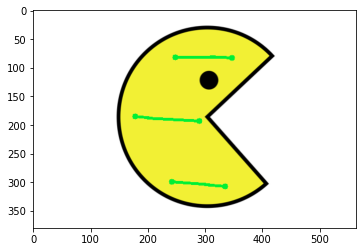

In [ ]:
mask = np.zeros_like(frame_2)

for i, (new, old) in enumerate(zip(good_new, good_old)):
  a, b = new.ravel()
  c, d = old.ravel()

  mask = cv2.circle(mask, (a, b), 5, (200), -1)

  mask = cv2.line(mask, (a,b), (c, d), (200), 3)

composite_im = np.copy(frame_2)
composite_im[mask!=0] = [0]

plt.imshow(composite_im)

[[[420.  80.]]

 [[410. 302.]]

 [[310. 186.]]

 [[411.  79.]]

 [[401. 302.]]

 [[301. 186.]]]


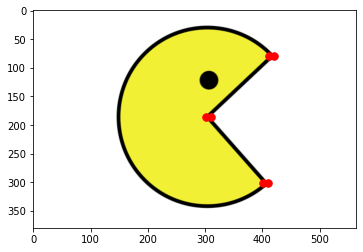

In [ ]:
pts_3 = cv2.goodFeaturesToTrack(gray_2, mask=None, **feature_params)
plt.imshow(frame_2)

for p in pts_3:
  plt.plot(p[0][0], p[0][1], 'r.', markersize=15)

print(pts_3)

In [ ]:
pts_4, match, err = cv2.calcOpticalFlowPyrLK(gray_2, gray_3, pts_3, None, **lk_params)


good_new = pts_4[match==1]
good_old = pts_3[match==1]

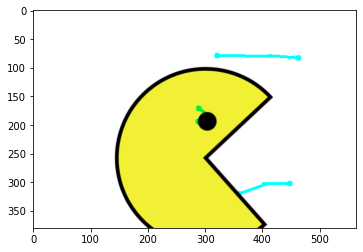

In [ ]:
mask = np.zeros_like(frame_3)

for i, (new, old) in enumerate(zip(good_new, good_old)):
  a, b = new.ravel()
  c, d = old.ravel()

  mask = cv2.circle(mask, (a, b), 5, (200), -1)

  mask = cv2.line(mask, (a, b), (c, d), (200), 3)

composite_im = np.copy(frame_3)
composite_im[mask!=0] = [0]

plt.imshow(composite_im)